In [1]:
def make_path_from_name(name="SAC/random"):
    # [DLPG, DLPG_MDN, SAC, PPO], [random, dpp, Fdpp]

    from pathlib import Path
    model, method = str.split(name,"/")

    path = Path(f"../results/{model}/{model}_{method}")
    assert path.exists()
    
    return path


import pandas as pd
import numpy as np

def results_from_path(path, plot_key = "Accuracy", seeds=range(10)):
    dfs = []
    for seed in seeds:
        csv_path = path / f"seed_{seed}" / f"test_result_seed_{seed}.csv"
        assert csv_path.exists()
        df = pd.read_csv(csv_path)
        dfs.append(df)
    
    plot_values = []
    for df in dfs:
        plot_values.append(df[plot_key].values)

    results = np.vstack(plot_values)
    return results

import scipy.stats as stats
import matplotlib.pyplot as plt

def get_model_method(name):
    model, method = str.split(name,"/")
    if method == "Converage": method = "Coverage"
    return model, method

def plot_combined(name, plot_key, results, color, PLOT=True):
    results = np.array(results)
    xs = np.arange(results.shape[1])
    ys = np.mean(results, axis=0)
    yerrs = stats.sem(results, axis=0)
    if PLOT:
        plt.fill_between(xs, ys-yerrs, ys+yerrs, alpha=0.2, color=color)
    
    model, method = get_model_method(name)

    label = f"[{str.upper(model[0])}{str.upper(method[0])}]{plot_key}"
    
    if PLOT:
        plt.plot(xs, ys, label= label, c=color)
        plt.legend()
    
    return ys

# Model 별 Plotting

In [3]:
for model in ["SAC", "DLPG", "DLPG_MDN"]: #["DLPG", "DLPG_MDN", "SAC", "PPO"]
    colors = ["k", "b", "r"]
    for plot_key in ["Accuracy", "Converage"]:
        plt.figure(figsize=(10,10))
        for color,method in zip(colors, ["random", "dpp", "Fdpp"]):
            name = f"{model}/{method}"
            path = make_path_from_name(name)
            
            results = results_from_path(path, plot_key = plot_key, seeds=range(1))
            quality_mean = plot_combined(name = name, plot_key = plot_key, results=results,color=color)
        plt.title(f"[{model}] {plot_key}")
        plt.ylim(0,1.0)
        plt.axis("on")
        plt.savefig(f"../plots/{model}_{plot_key}.jpg",bbox_inches='tight', dpi=150)
        plt.show()


AssertionError: 

<Figure size 720x720 with 0 Axes>

# Sampling 별 비교

/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 720x720 with 0 Axes>

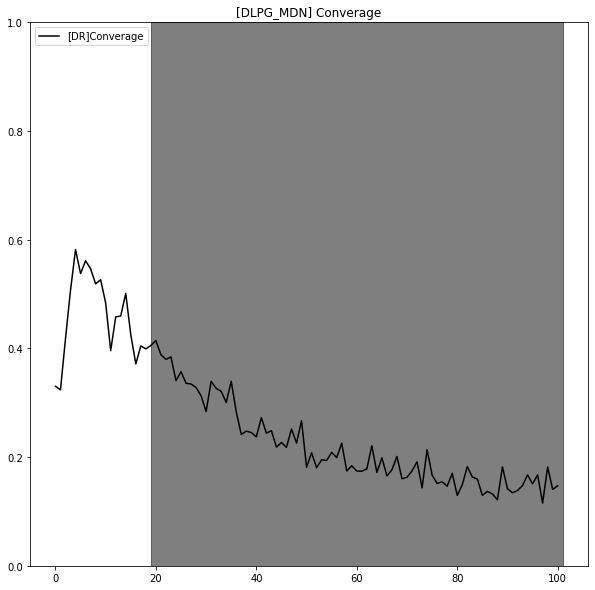

/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 720x720 with 0 Axes>

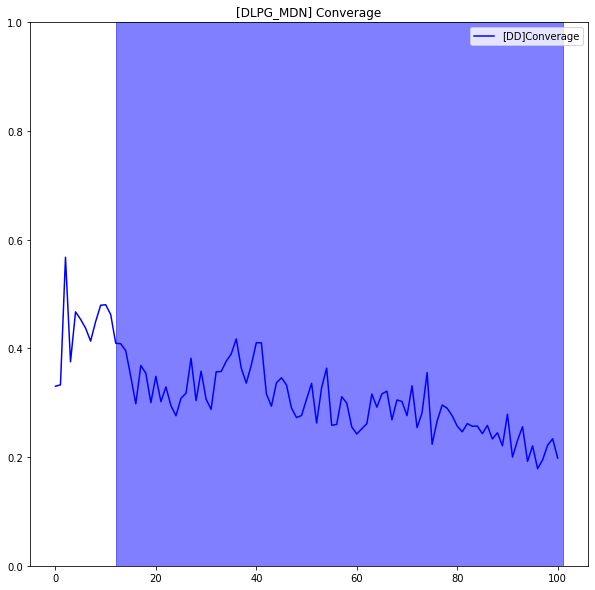

/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 720x720 with 0 Axes>

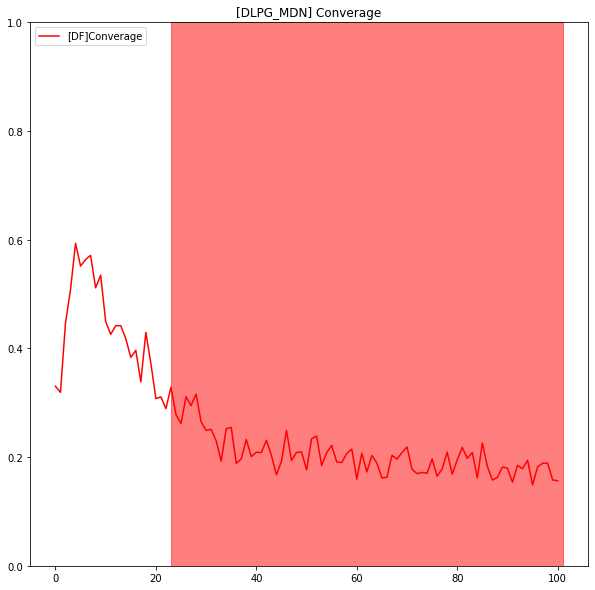

In [6]:
for model in ["DLPG_MDN"]: #["DLPG", "DLPG_MDN", "SAC", "PPO"]
    colors = ["k", "b", "r"]
    
    for color,method in zip(colors, ["random", "dpp", "Fdpp"]):
        plot_key = "Accuracy"
        plt.figure(figsize=(10,10))
        name = f"{model}/{method}"
        path = make_path_from_name(name)
        
        results = results_from_path(path, plot_key = plot_key, seeds=range(1))
        quality_mean = plot_combined(name = name, plot_key = plot_key, results=results,color=color, PLOT = False)


        plot_key = "Converage"
        plt.figure(figsize=(10,10))
        name = f"{model}/{method}"
        path = make_path_from_name(name)
        
        results = results_from_path(path, plot_key = plot_key, seeds=range(1))
        diversity_mean = plot_combined(name = name, plot_key = plot_key, results=results,color=color)
    
        plt.title(f"[{model}] {plot_key}")
        start = np.argwhere(quality_mean > 0.95)[0][0]
        plt.axvspan(start, 101, color=color, alpha=0.5)
        plt.ylim(0,1.0)
        plt.axis("on")
        plt.savefig(f"../plots/{model}_{plot_key}.jpg",bbox_inches='tight', dpi=150)
        plt.show()


# Sampling 별 비교

/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


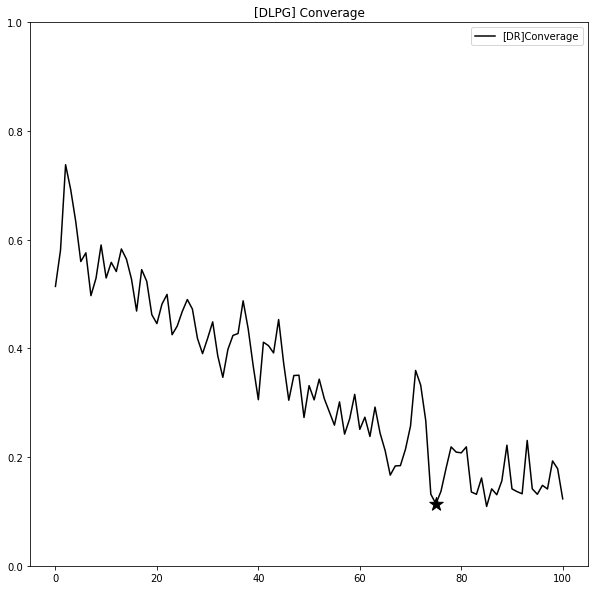

/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


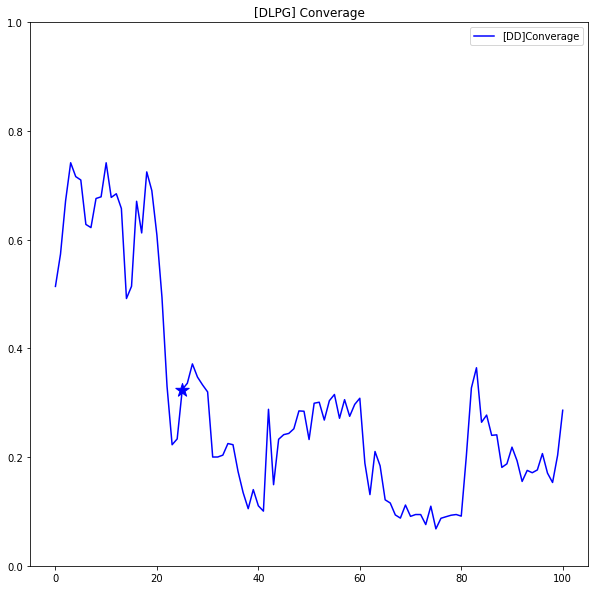

/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/taerim/.pyenv/versions/3.9.10/envs/style-transfer/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


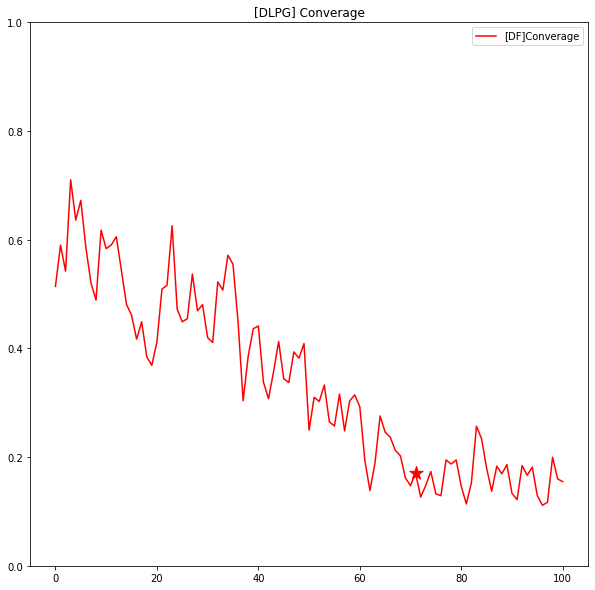

In [12]:
acc_thres = 0.9
for model in ["DLPG"]: #["DLPG", "DLPG_MDN", "SAC", "PPO"]
    colors = ["k", "b", "r"]
    
    for color,method in zip(colors, ["random", "dpp", "Fdpp"]):
        
        plot_key = "Accuracy"
        name = f"{model}/{method}"
        path = make_path_from_name(name)
        
        results = results_from_path(path, plot_key = plot_key, seeds=range(1))
        quality_mean = plot_combined(name = name, plot_key = plot_key, results=results,color=color, PLOT=False)


        plt.figure(figsize=(10,10))
        plot_key = "Converage"
        name = f"{model}/{method}"
        path = make_path_from_name(name)
        
        results = results_from_path(path, plot_key = plot_key, seeds=range(1))
        diversity_mean = plot_combined(name = name, plot_key = plot_key, results=results,color=color)
    
        plt.title(f"[{model}] {plot_key}")
        if len(np.argwhere(quality_mean > acc_thres)) != 0:
            start = np.argwhere(quality_mean > acc_thres)[0][0]
            plt.scatter(start, diversity_mean[start], marker="*", s=200, color=color)
        plt.ylim(0,1.0)
        plt.axis("on")
        plt.savefig(f"../plots/{model}_{plot_key}.jpg",bbox_inches='tight', dpi=150)
        plt.show()


In [60]:
results

array([[0.276, 0.292, 0.324, 0.434, 0.6  , 0.58 , 0.414, 0.658, 0.6  ,
        0.696, 0.726, 0.752, 0.96 , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 0.992, 1.   , 0.998, 1.   ,
        1.   , 0.992, 0.996, 0.972, 0.982, 0.994, 1.   , 0.996, 0.992,
        0.992, 0.996, 1.   , 0.992, 0.996, 0.998, 0.99 , 0.986, 0.998,
        0.986, 0.994, 1.   , 0.988, 0.992, 0.992, 0.982, 0.96 , 0.992,
        1.   , 1.   , 0.974, 0.986, 0.994, 0.984, 0.958, 0.832, 0.908,
        0.894, 0.934, 0.938, 0.942, 0.98 , 0.998, 0.99 , 1.   , 0.99 ,
        0.992, 1.   , 0.984, 0.924, 0.888, 0.61 , 0.746, 0.802, 0.778,
        0.796, 0.796, 0.88 , 0.996, 1.   , 0.998, 1.   , 0.96 , 0.816,
        0.864, 0.966, 0.948, 0.998, 0.978, 0.944, 0.976, 0.804, 0.91 ,
        0.986, 0.936]])

In [5]:


name = "SAC/random"
path = make_path_from_name(name)

In [6]:


results = results_from_path(path, plot_key = "Accuracy")

NameError: name 'plot_target' is not defined

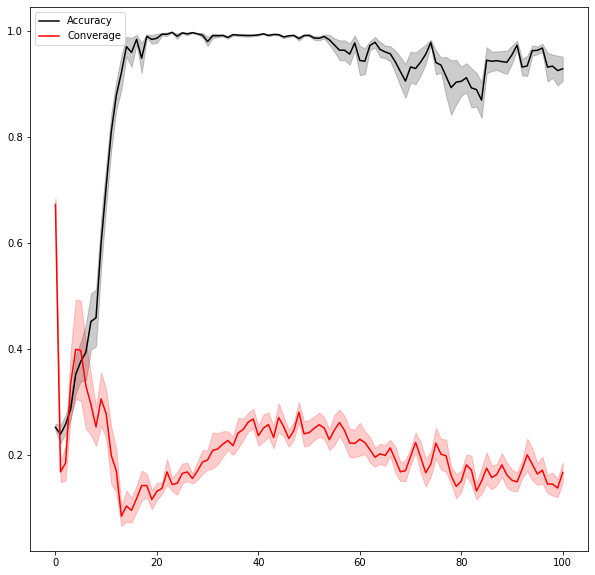